In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline
from IPython.core.pylabtools import figsize

In [2]:
def softmax(x):
    # unstabilized softmax
    e = np.exp(x)
    return e/e.sum()

In [3]:
np.random.seed(1)
y = np.random.normal(0, 1, 10)
softmax(y)

array([ 0.29213776,  0.03122202,  0.03394387,  0.01968607,  0.13676823,
        0.00576233,  0.32953807,  0.02688782,  0.07919548,  0.04485835])

In [4]:
softmax(1e-10*y)

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

In [5]:
softmax(500*y)

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


array([ nan,   0.,   0.,   0.,   0.,   0.,  nan,   0.,   0.,   0.])

In [6]:
def softmax_stabilized(x):
    # stable version
    e = np.exp(x-x.max())
    return e/e.sum()

In [7]:
softmax_stabilized(500*y)

array([  6.93511221e-027,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   1.09601987e-191,   0.00000000e+000,
         1.00000000e+000,   0.00000000e+000,   2.49688698e-310,
         0.00000000e+000])

In [8]:
def e(x,y):
    return (0.35*x)**2 + (2.*y)**2 + 1.*x*y 

In [9]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))

In [10]:
ell = e(xx, yy)
ell.shape

(100, 100)

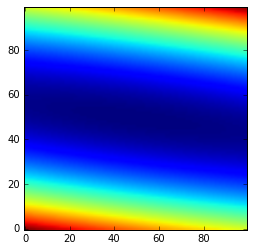

In [11]:
plt.imshow(ell, origin="lower");

In [12]:
# 0, 10
x = tf.Variable(initial_value=-5, dtype=tf.float32, name="x")
y = tf.Variable(initial_value=10, dtype=tf.float32, name="y")

#loss = (0.35*x)**2 + (2*y)**2 + x*y
loss = e(x,y)

optimizer = tf.train.GradientDescentOptimizer(0.01)
#optimizer = tf.train.MomentumOptimizer(0.01, momentum=0.9)
minimize = optimizer.minimize(loss)

In [13]:
x_traj = []
y_traj = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(100):
        _, xnext, ynext = sess.run([minimize, x, y])
        x_traj.append(xnext)
        y_traj.append(ynext)

In [14]:
tf.reset_default_graph()

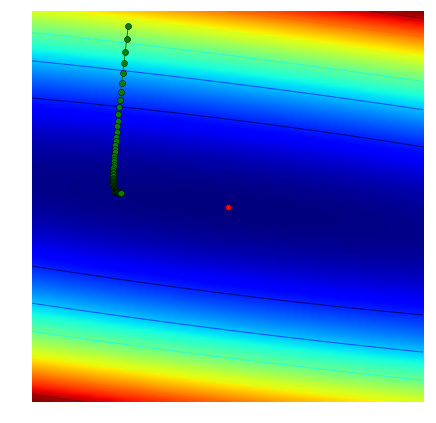

In [15]:
figsize(10, 7)
plt.imshow(ell, origin="lower", extent=[-10, 10, -10, 10])
plt.contour(xx, yy, ell)
plt.plot(x_traj, y_traj, "go-")
plt.plot([0], [0], "ro")
plt.axis("off");